# 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#2.Data Loading

In [7]:
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


3.Data Preprocessing

### Checking Miss Values

In [8]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [10]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

#4.LabeL Encoder

In [11]:
le = LabelEncoder()
df['person_gender'] = le.fit_transform(df['person_gender'])
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])

In [12]:
df["person_education"].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [13]:
df["person_home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [14]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [15]:
df['person_education'] = le.fit_transform(df["person_education"])
df['person_home_ownership'] = le.fit_transform(df["person_home_ownership"])
df['loan_intent'] = le.fit_transform(df["loan_intent"])

In [16]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [17]:
corr = df.corr()

In [18]:
corr

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,0.017528,-0.014649,0.193698,0.954412,-0.039008,0.050750,0.032005,0.013402,-0.043299,0.861985,0.178432,-0.025917,-0.021476
person_gender,0.017528,1.000000,-0.002267,0.010173,0.015078,-0.001172,0.010647,-0.003107,0.003662,-0.000367,0.011999,-0.000223,0.000704,-0.000561
person_education,-0.014649,-0.002267,1.000000,0.000331,-0.012034,-0.000290,-0.002441,0.004356,0.000336,-0.006984,-0.014576,0.012498,-0.002669,-0.001747
person_income,0.193698,0.010173,0.000331,1.000000,0.185987,-0.219870,0.242290,0.008639,0.001510,-0.234177,0.124316,0.035919,0.061483,-0.135808
person_emp_exp,0.954412,0.015078,-0.012034,0.185987,1.000000,-0.035884,0.044589,0.031230,0.016631,-0.039862,0.824272,0.186196,-0.029231,-0.020481
person_home_ownership,-0.039008,-0.001172,-0.000290,-0.219870,-0.035884,1.000000,-0.150243,0.001828,0.130437,0.148933,-0.029549,-0.006421,-0.125974,0.233842
loan_amnt,0.050750,0.010647,-0.002441,0.242290,0.044589,-0.150243,1.000000,-0.001068,0.146093,0.593011,0.042969,0.009074,-0.059009,0.107714
loan_intent,0.032005,-0.003107,0.004356,0.008639,0.031230,0.001828,-0.001068,1.000000,-0.005372,0.003269,0.030912,0.016244,0.038469,-0.072158
loan_int_rate,0.013402,0.003662,0.000336,0.001510,0.016631,0.130437,0.146093,-0.005372,1.000000,0.125209,0.018008,0.011498,-0.181800,0.332005
loan_percent_income,-0.043299,-0.000367,-0.006984,-0.234177,-0.039862,0.148933,0.593011,0.003269,0.125209,1.000000,-0.031868,-0.011483,-0.203252,0.384880


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

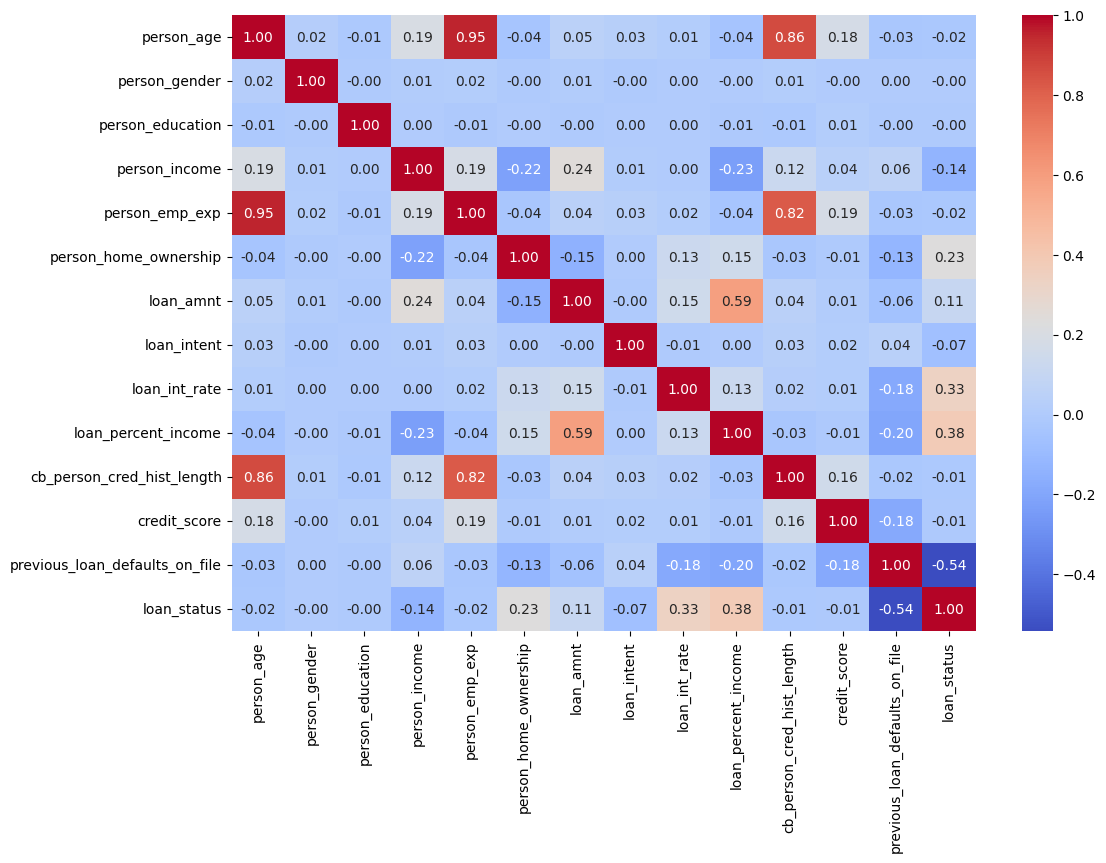

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='0.2f',  cmap="coolwarm",cbar=True)
plt.show()

### Data Splitting

In [26]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
print("Train class distribution:")
print(np.unique(y_train, return_counts=True))

print("Test class distribution:")
print(np.unique(y_test, return_counts=True))

Train class distribution:
(array([0, 1]), array([28000,  8000]))
Test class distribution:
(array([0, 1]), array([7000, 2000]))


In [28]:
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include='object').columns
scaler=RobustScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# 5.Model Training

In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "knn" :KNeighborsClassifier(n_neighbors=5)
}

#6.Models Evaluation

Training Logistic Regression...


C:\Users\olumi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      7000
           1       0.75      0.73      0.74      2000

    accuracy                           0.89      9000
   macro avg       0.83      0.83      0.83      9000
weighted avg       0.88      0.89      0.88      9000



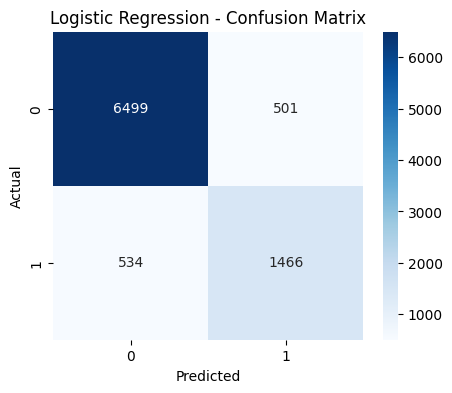

Training Decision Tree...
Decision Tree Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7000
           1       0.78      0.77      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.86      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000



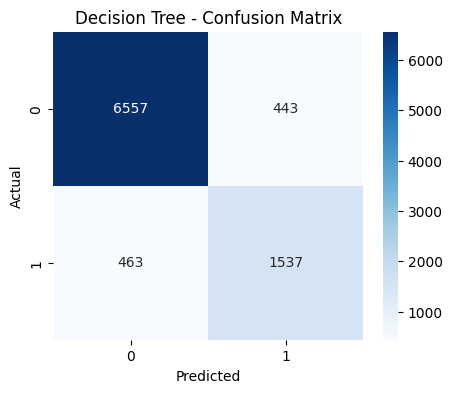

Training SVM...
SVM Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89      7000
           1       0.86      0.15      0.26      2000

    accuracy                           0.81      9000
   macro avg       0.83      0.57      0.57      9000
weighted avg       0.81      0.81      0.75      9000



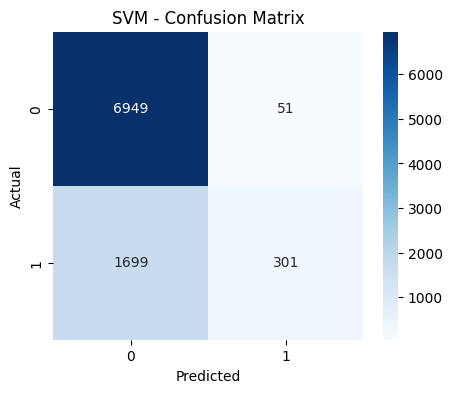

Training Random Forest...
Random Forest Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7000
           1       0.90      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



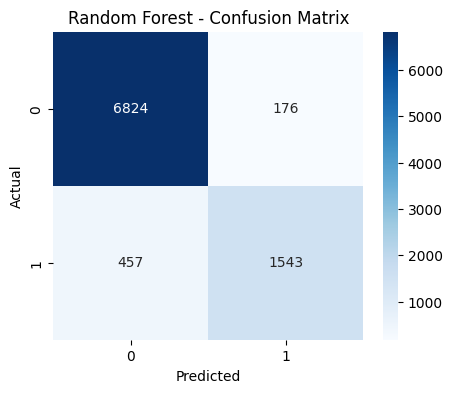

Training knn...
knn Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      7000
           1       0.67      0.52      0.59      2000

    accuracy                           0.84      9000
   macro avg       0.77      0.72      0.74      9000
weighted avg       0.83      0.84      0.83      9000



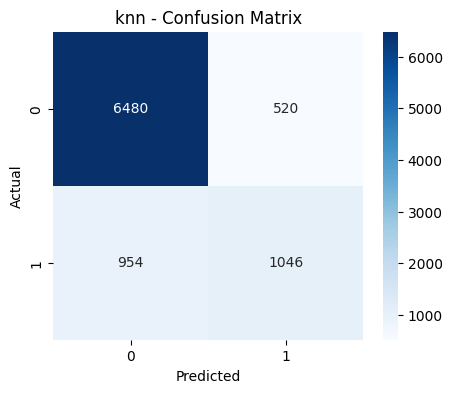

In [30]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)   # Train the model
    y_pred = model.predict(X_test)  # Predict on test set

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("="*50)

###Bias–Variance Tradeoff

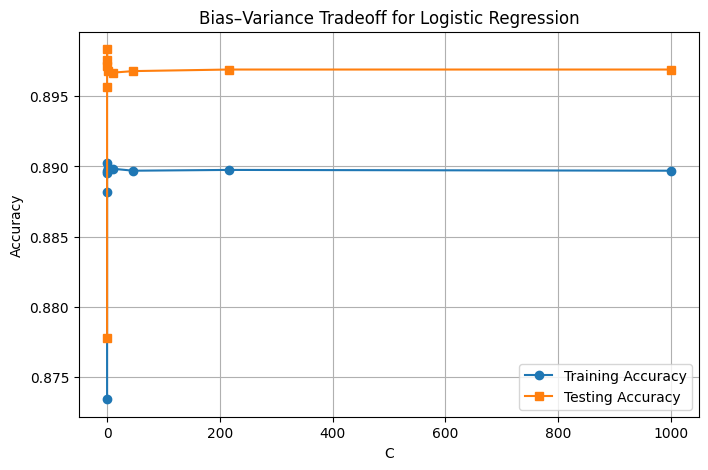

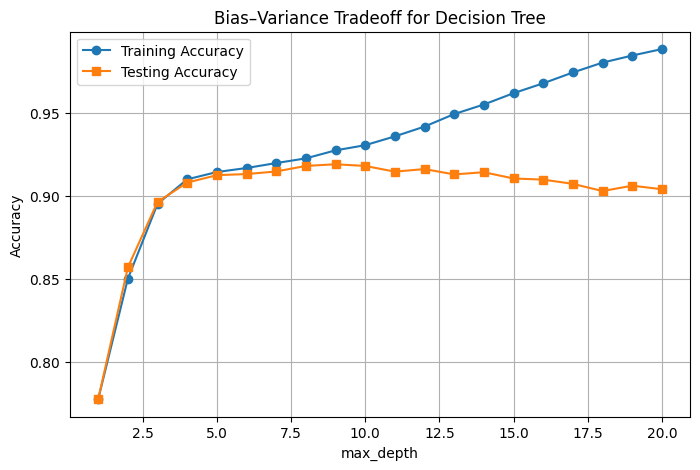

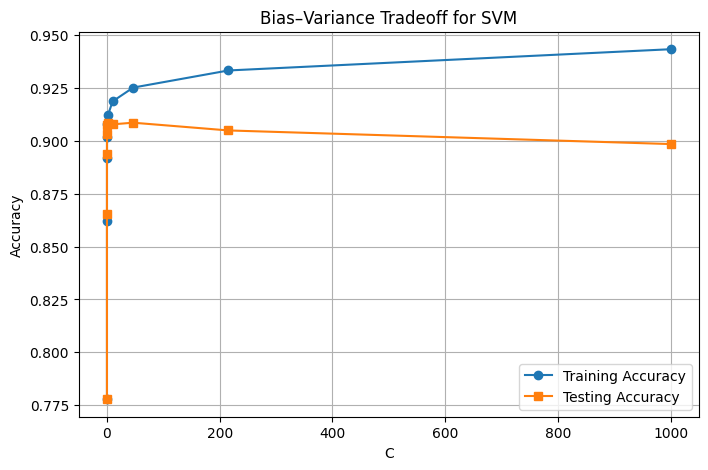

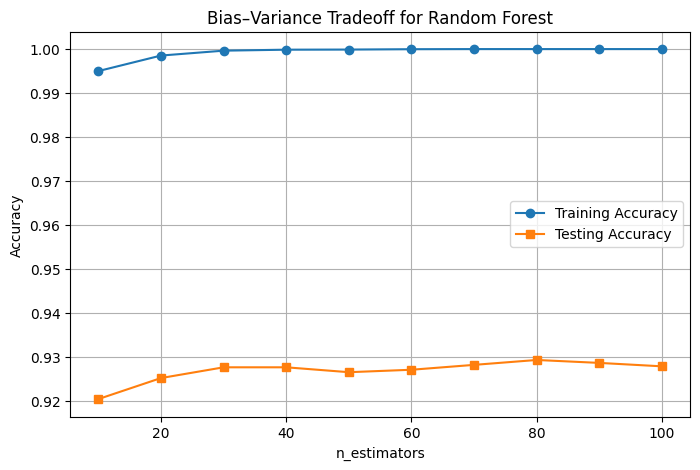

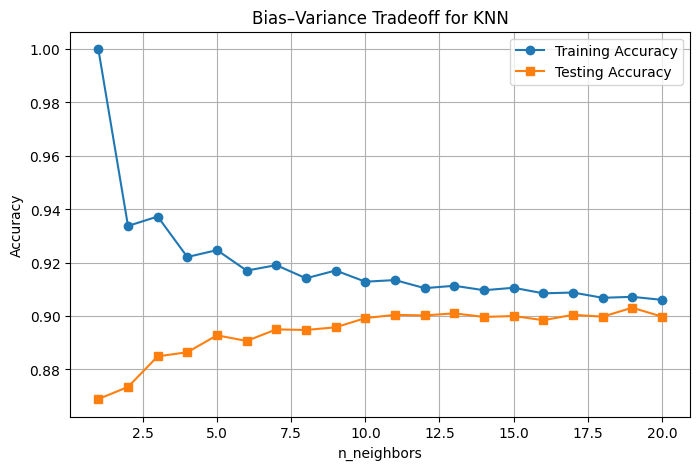

In [31]:
param_ranges = {
    "Logistic Regression": {"C": np.logspace(-3, 3, 10)},  # inverse of regularization strength
    "Decision Tree": {"max_depth": range(1, 21)},          # tree depth
    "SVM": {"C": np.logspace(-3, 3, 10)},                  # regularization
    "Random Forest": {"n_estimators": range(10, 110, 10)}, # number of trees
    "KNN": {"n_neighbors": range(1, 21)}                   # neighbors
}

# Loop through models and plot bias-variance tradeoff
for model_name, params in param_ranges.items():
    train_acc = []
    test_acc = []

    # Loop over the single parameter for this model
    for param, values in params.items():
        for val in values:
            if model_name == "Logistic Regression":
                model = LogisticRegression(C=val, max_iter=1000)
            elif model_name == "Decision Tree":
                model = DecisionTreeClassifier(max_depth=val)
            elif model_name == "SVM":
                model = SVC(C=val)
            elif model_name == "Random Forest":
                model = RandomForestClassifier(n_estimators=val, random_state=42)
            elif model_name == "KNN":
                model = KNeighborsClassifier(n_neighbors=val)

            # Fit and record accuracy
            model.fit(X_train_transformed, y_train)
            train_acc.append(model.score(X_train_transformed, y_train))
            test_acc.append(model.score(X_test_transformed, y_test))

    # Plot results
    plt.figure(figsize=(8, 5))
    plt.plot(list(params.values())[0], train_acc, marker='o', label="Training Accuracy")
    plt.plot(list(params.values())[0], test_acc, marker='s', label="Testing Accuracy")
    plt.xlabel(list(params.keys())[0])
    plt.ylabel("Accuracy")
    plt.title(f"Bias–Variance Tradeoff for {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()
